In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os

# univariate, bivariate, and multivariate 

In [2]:
# Univariant Analysis
""" 
Univariant Analysis is exame one variable at a time.
example: df['column_name']
"""

" \nUnivariant Analysis is exame one variable at a time.\nexample: df['column_name']\n"

In [3]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True)['data']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 0, 'Sepal Length (cm)')

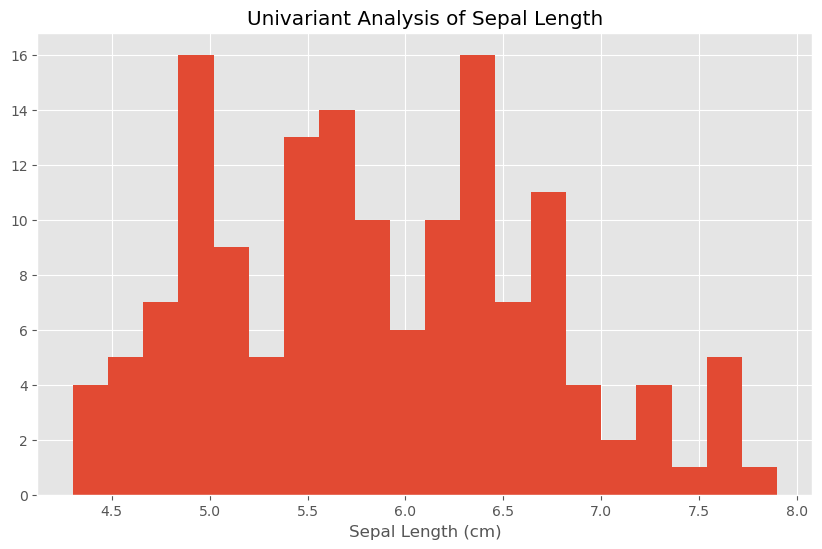

In [6]:
plt.style.use('ggplot')
# Set the figure size
plt.figure(figsize=(10, 6))
plt.hist(df['sepal length (cm)'],bins=20)
plt.title('Univariant Analysis of Sepal Length')
plt.xlabel('Sepal Length (cm)')

In [7]:
# Bivarinet analysis
""" 
Bivarinet Analysis is exame two variable at a time.
example: df[['column_name1', 'column_name2']]
"""

" \nBivarinet Analysis is exame two variable at a time.\nexample: df[['column_name1', 'column_name2']]\n"

<Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>

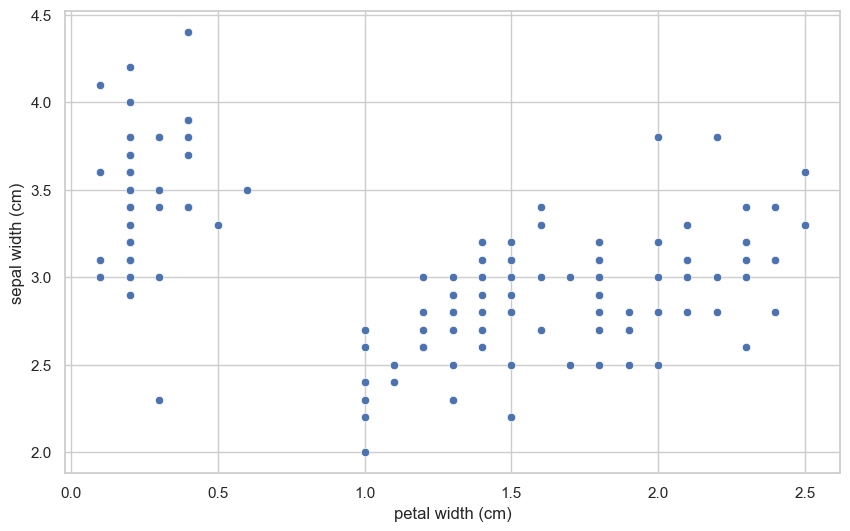

In [10]:
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(10, 6))
sns.scatterplot(x =df['petal width (cm)'],y=df['sepal width (cm)'])

In [11]:
# multivariant analysis
""" 
Multivariant Analysis is exame more than two variable at a time.
example: df[['column_name1', 'column_name2', 'column_name3']]
"""

" \nMultivariant Analysis is exame more than two variable at a time.\nexample: df[['column_name1', 'column_name2', 'column_name3']]\n"

d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
d:\anaconda\Lib\site

<Figure size 1000x600 with 0 Axes>

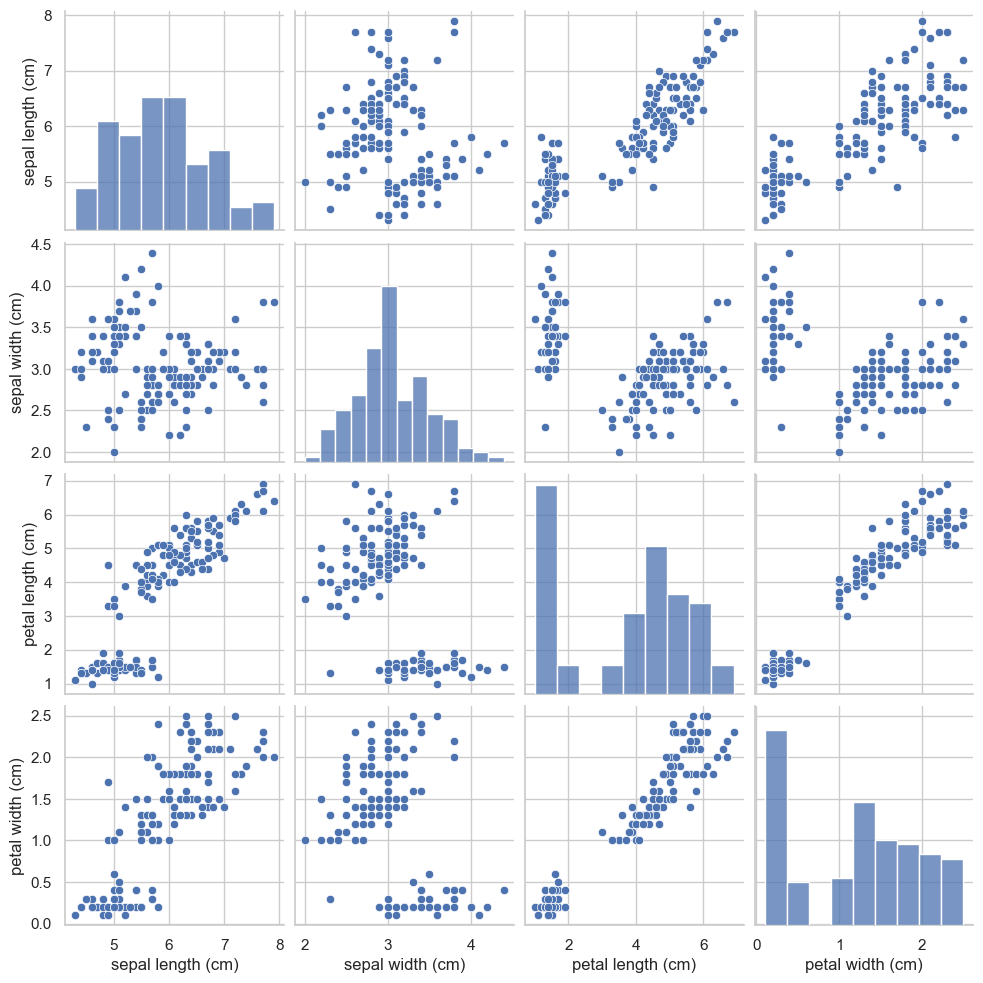

In [13]:
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(10, 6))
sns.pairplot(df, palette='Set2')
plt.show()

#  Handle missing data during EDA?

In [14]:
# checking missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
# 1. drop missing values
df.dropna(inplace=True) # delete entire row

In [18]:
# 2. Imputation Techniques

## mean imputation
df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean(),inplace=True)

## median imputation
df['sepal length (cm)'].fillna(df['sepal length (cm)'].median(),inplace=True)

C:\Users\www58\AppData\Local\Temp\ipykernel_18228\3548802672.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean(),inplace=True)
C:\Users\www58\AppData\Local\Temp\ipykernel_18228\3548802672.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [20]:
# 3. Predict Missing Values using Machine Learning 
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df[['petal length (cm)']] = imputer.fit_transform(df[['petal length (cm)']])

#  histogram vs. a box plot?

Text(0.5, 1.0, 'Distribution of Sepal Length')

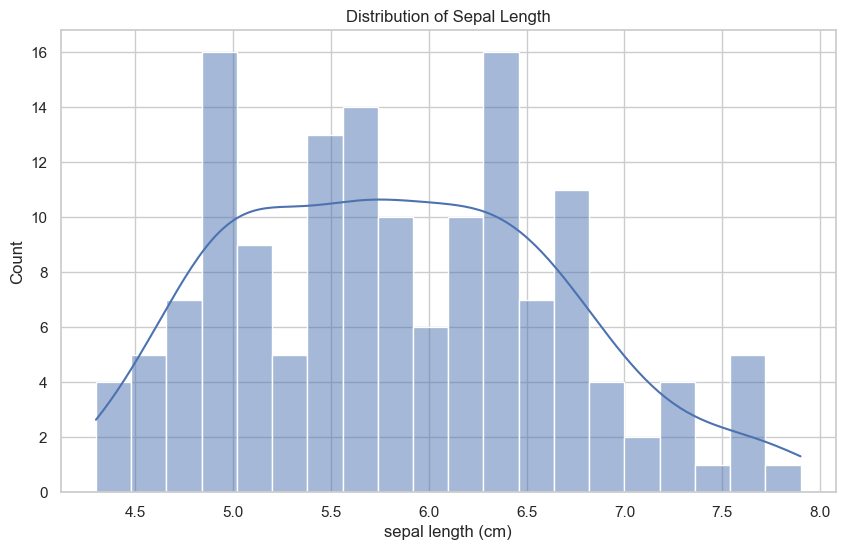

In [21]:
""" 
Histrogram show distribution of a single variable.
"""
plt.figure(figsize=(10, 6))
sns.histplot(df['sepal length (cm)'], bins=20, kde=True)
plt.title('Distribution of Sepal Length')

Text(0.5, 1.0, 'Boxplot of Sepal Length')

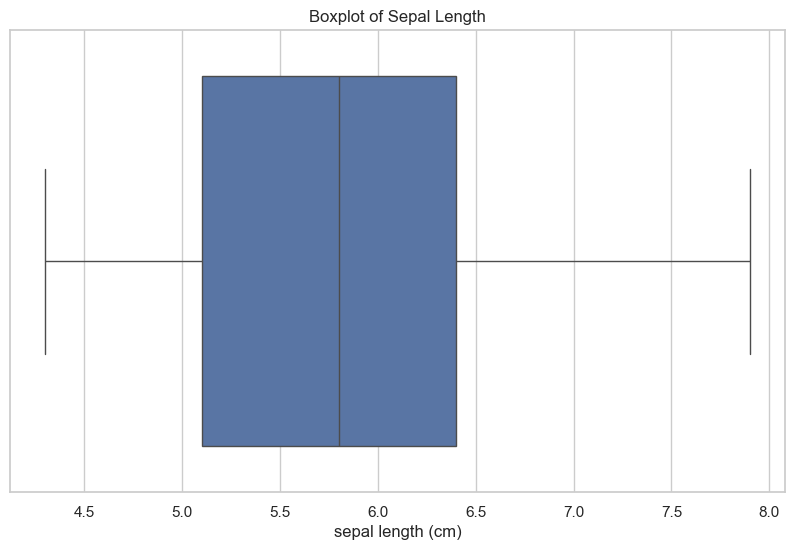

In [22]:
""" 
Boxplot show not only the distribution of a single variable but also the presence of outliers, spred of data.
"""

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sepal length (cm)'])
plt.title('Boxplot of Sepal Length')

#  detect and treat outliers in a dataset

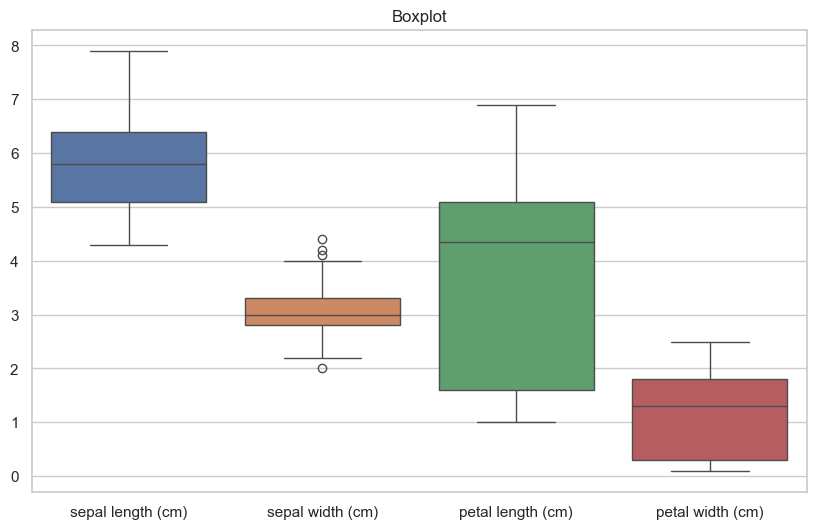

In [26]:
# 1. histogram
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title('Boxplot')
plt.show()

In [31]:
# 2. Iqr method
q1 = df['sepal length (cm)'].quantile(0.25)
q3 = df['sepal length (cm)'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 -1.5*iqr
upper_bound = q3 -1.5*iqr

outliers = df[(df['sepal length (cm)']<lower_bound) | (df['sepal length (cm)']> upper_bound)]
df.shape, outliers.shape

((150, 4), (146, 4))

In [33]:
# remove outliers
df = df[(df['sepal length (cm)']>=lower_bound) | (df['sepal length (cm)']<=upper_bound)]
df.shape

(150, 4)

In [34]:
# Transform data
df['sepal width (cm)'] = np.log(df['sepal width (cm)']) # log transformation

<Axes: >

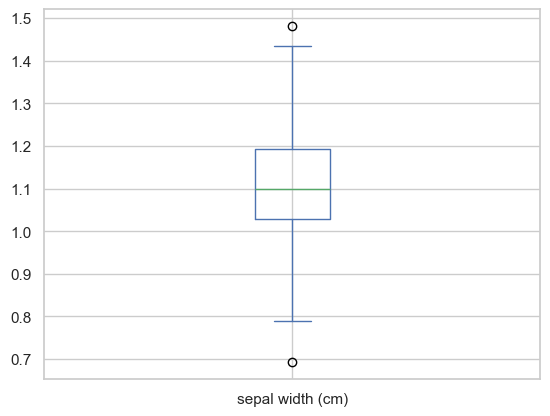

In [36]:
df['sepal width (cm)'].plot(kind='box')

# multicollinearity detect

<Axes: >

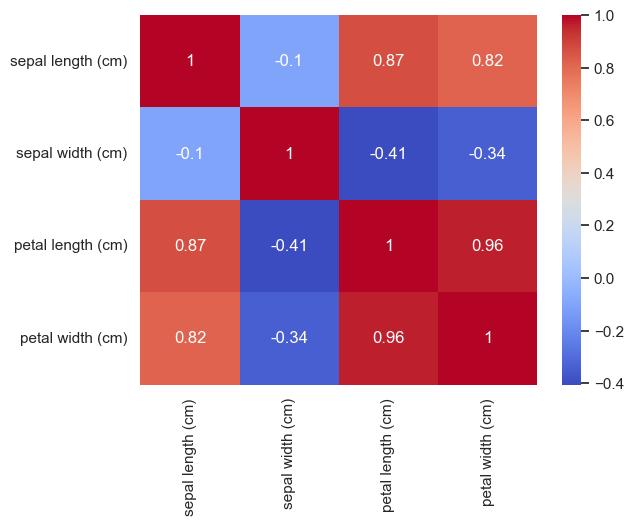

In [37]:
# Heatmap
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [38]:
# VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  [variance_inflation_factor(df.values,i) for i  in range(df.shape[1])]

In [39]:
vif

[275.61426804644316,
 105.54112078634473,
 170.70383089116515,
 55.231491916500794]

#  check for normality

<Axes: >

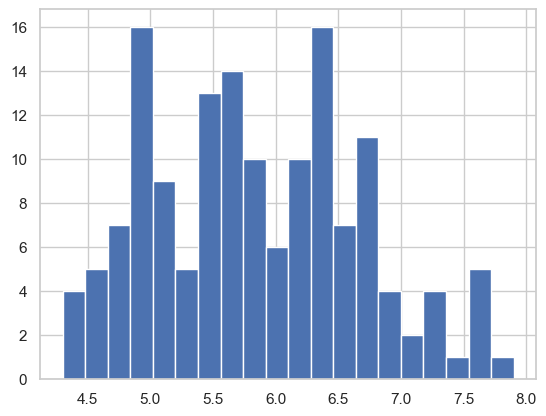

In [40]:
# histogram
df['sepal length (cm)'].hist(bins=20)

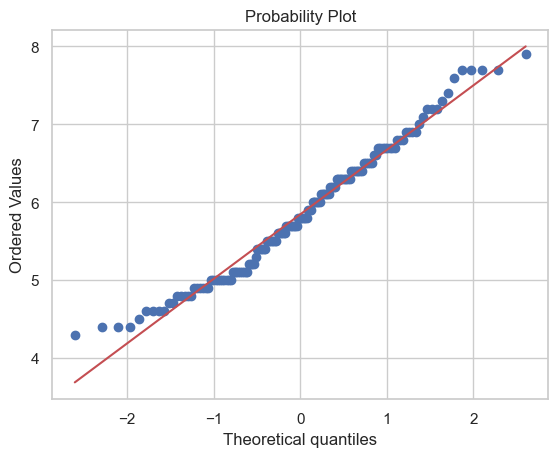

In [41]:
# qq plot
import scipy.stats as stas
stas.probplot(df['sepal length (cm)'],dist='norm',plot=plt)
plt.show()

In [42]:
# Shapiro-Wilk Test 
from scipy.stats import shapiro
stat , p =shapiro(df['sepal length (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.976, p=0.010


# e expected value of a probability distribution 
 A die roll (1-6) has equal probabilities. 


In [43]:
outcomes= np.array([1,2,3,4,5,6])
proba = np.full(6,1/6)

exp_value = np.sum(outcomes*proba)
print('Expected Value:',exp_value)

Expected Value: 3.5


# a normal distribution?

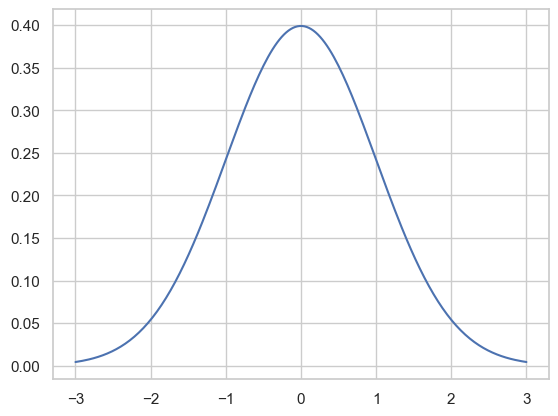

In [45]:
from scipy import stats
x = np.linspace(-3,3,200)

y =stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x,y)

#  exponential distribution

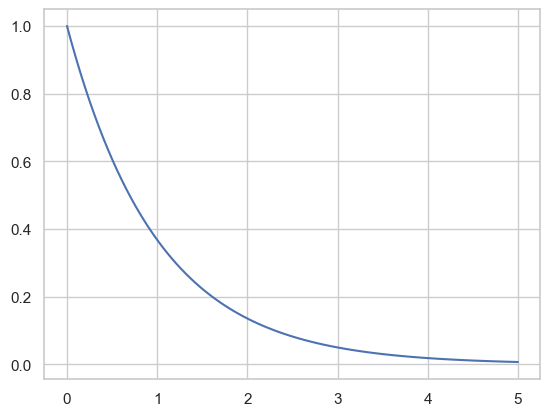

In [46]:
from scipy.stats import expon 
import matplotlib.pyplot as plt 
x = np.linspace(0, 5, 100) 
y = expon.pdf(x, scale=1) 
plt.plot(x, y)

# If a coin is flipped 100 times, what is the probability of getting exactly 50 heads (Binomial distribution)

In [1]:
from scipy import stats

n = 100
p = 50/100
k = 50

proba = stats.binom.pmf(k, n, p)
print('Probability of getting 50 heads in 100 tosses:', proba)

Probability of getting 50 heads in 100 tosses: 0.07958923738717875


# Central Limit Theorem

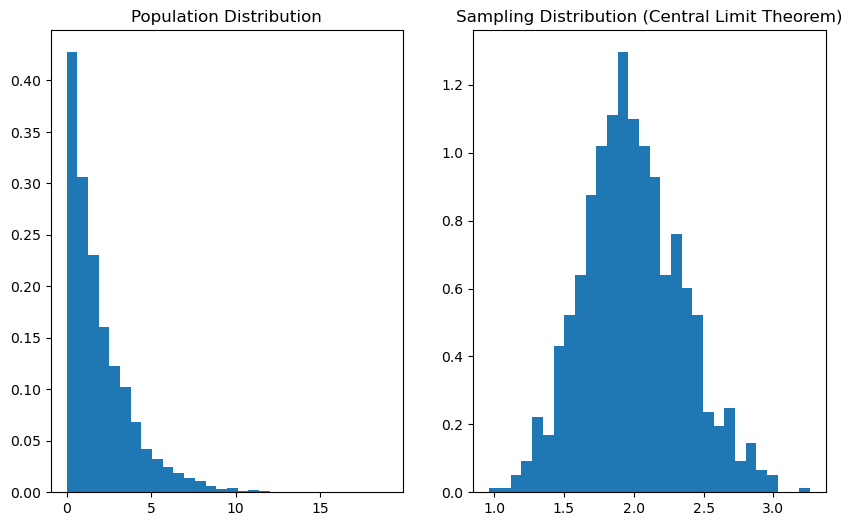

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
# Generate a non-normal population (exponential distribution) 
population = np.random.exponential(scale=2, size=10000) 
# Take multiple sample means (size=30) 
sample_means = [np.mean(np.random.choice(population, 30)) for _ in 
range(1000)] 
# Plot the distribution of sample means 
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(population, bins=30, density=True)
plt.title("Population Distribution")
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, density=True) 
plt.title("Sampling Distribution (Central Limit Theorem)") 
plt.show()

#  Skewed vs. Normal Data

In [6]:
import  seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# normal distribution
normal = np.random.normal(loc=50, scale=10, size=1000)

# skewed distribution
skewed = np.random.exponential(scale=10, size=1000)

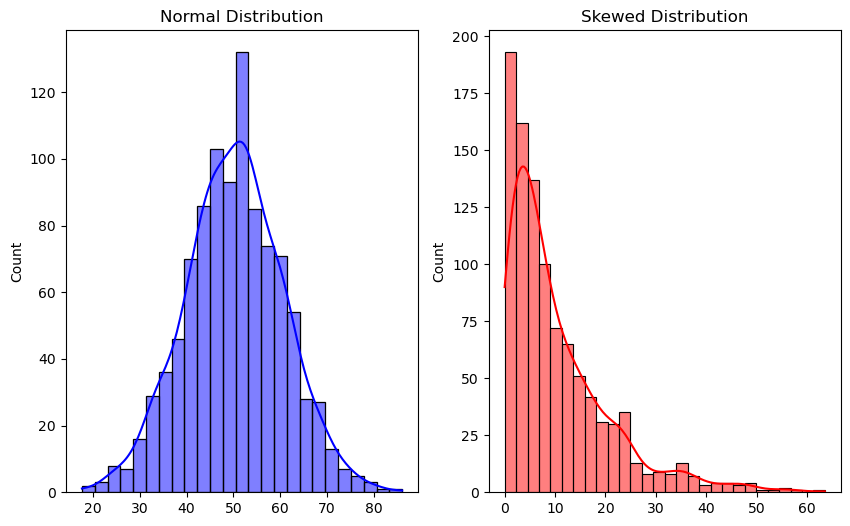

In [7]:
# plotting
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Normal Distribution')
sns.histplot(normal, kde=True, color='blue')

plt.subplot(1, 2, 2)
plt.title('Skewed Distribution')
sns.histplot(skewed, kde=True, color='red')
plt.show()

# Increasing Standard Deviation vs Decreasing Standard Deviation

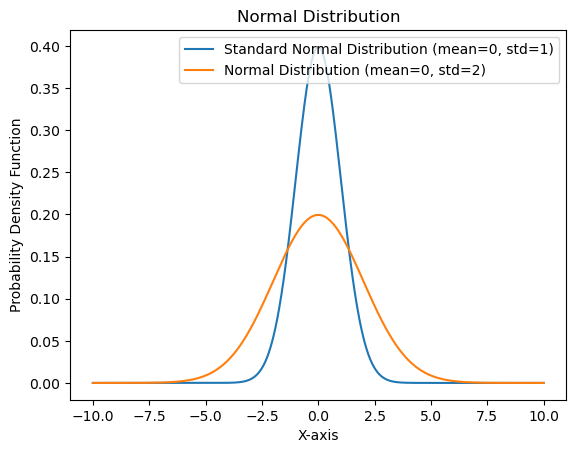

In [8]:
x =np.linspace(-10,10,1000)
y1 = stats.norm.pdf(x, loc=0, scale=1)
y2 = stats.norm.pdf(x, loc=0, scale=2)

plt.plot(x, y1, label='Standard Normal Distribution (mean=0, std=1)')
plt.plot(x, y2, label='Normal Distribution (mean=0, std=2)')
plt.title('Normal Distribution')
plt.xlabel('X-axis')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

# You are running a system that gets failures at an average rate of 3 per day. What is the probability that no failures occur in the next day

In [10]:
lambda_value = 3
k =0

probability = stats.poisson.pmf(k, lambda_value)
print('Probability of getting 0 events in a Poisson distribution with lambda=3:', probability)

Probability of getting 0 events in a Poisson distribution with lambda=3: 0.049787068367863944


#  p-value in hypothesis testing

In [4]:
from scipy.stats import ttest_1samp
import random
data = random.choices(range(1, 100), k=50)
t_stat, p_value = ttest_1samp(data, 0)
print('T-statistic:', t_stat)
print('P-value:', p_value)
if p_value < 0.05:
	 print('Reject the null hypothesis')
else:
	 print('Fail to reject the null hypothesis')

T-statistic: 12.23290912009909
P-value: 1.660884672339369e-16
Reject the null hypothesis


# confidence interval

In [12]:
import scipy.stats as stats
import numpy as np

data = random.choices(range(1, 50),k=10)
mean = np.mean(data)

std_error = stats.sem(data)
ci = stats.t.interval(0.95, len(data)-1,loc=mean, scale=std_error)
print('Confidence Interval:', ci)

Confidence Interval: (13.104665157620486, 33.49533484237951)


# One-Sample T-Test

In [14]:
from scipy.stats import ttest_1samp 
sample_data = [50, 55, 60, 53, 58, 52, 57] 
t_stat, p_value = ttest_1samp(sample_data, 55) 
print("p-value:", p_value)
print("t-statistic:", t_stat)

p-value: 1.0
t-statistic: 0.0


# ANOVA

In [1]:
from scipy.stats import f_oneway
sample1 = [50, 55, 60, 53, 58, 52, 57]
sample2 = [45, 50, 55, 48, 53, 49, 52]
sample3 = [40, 45, 50, 43, 48, 44, 47]

f_stat, p_value = f_oneway(sample1, sample2, sample3)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 14.10162601626017
p-value: 0.00020672816252374478
